In [1]:
import pandas as pd
#df1 reads tab 2 of S4 Net 16 thru 20 file
df1 = pd.read_excel(r'C:\GSA_Project\S4 Net 16 thru 20.xlsx', sheet_name = 1)
#df2 reads tab 4 of S4 Net 16 thru 20 file
df2 = pd.read_excel(r'C:\GSA_Project\S4 Net 16 thru 20.xlsx', sheet_name = 3)
#task 1 :  remove scholar irrelevant, i.e, scholars which dont exist int the edgelist
x = df1[df1['Unique Researcher ID'].isin(df2['Unique researcher ID [one unique researcher per row, add addl rows with same proposal ID for all collaborators on proposal]'])]
x.to_excel('task1.xlsx', index = False)

In [28]:
#Task 2 : Filter out GFL scholars (sustainability)

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
x=[]
def find_best_match(sentence, sentence_list):
    # Vectorize the sentences
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([sentence] + sentence_list)

    # Calculate cosine similarity between the sentence and all other sentences
    similarity_scores = cosine_similarity(vectors[0], vectors[1:]).flatten()

    # Find the index of the highest similarity score
    best_match_index = similarity_scores.argmax()

    # Get the highest similarity score
    best_similarity_score = similarity_scores[best_match_index]

    # Return the best matching sentence and its similarity score
    return sentence_list[best_match_index], best_similarity_score

# Example usage
# df_a = pd.read_excel(r'C:\Users\aakkim\Downloads\S4 Net 16 thru 20.xlsx', sheet_name=1)
df_a = pd.read_excel('task1.xlsx')
df_b = pd.read_excel(r'C:\Users\aakkim\Downloads\20230517-group-people.xlsx')

# Extract the sentences from the DataFrames
sentences_a = df_a['Name']
sentences_b = df_b['Name'].tolist()

matches_1 = []
matches_2 = []
for index,row in sentences_a.iteritems():
    best_match, similarity_score = find_best_match(row, sentences_b)
    if similarity_score > 0.6:
        matches_1.append((row, best_match))
        df_a.loc[index, 'Match' ]=1
        df_a.loc[index, 'Match' ]=1
        df_a.loc[index, 'Best Match' ]= best_match
                
    elif similarity_score < 0.6 and similarity_score > 0.5:
        matches_2.append((row, best_match))
        df_a.loc[index, 'Match' ]=2
        df_a.loc[index, 'Match' ]=2
        df_a.loc[index, 'Best Match' ]= best_match
    
    else:
        df_a.loc[index, 'Match' ]=0
        df_a.loc[index, 'Match' ]=0
        df_a.loc[index, 'Best Match' ]= best_match
    df_a.loc[index,'Score']=similarity_score



# Create a DataFrame to store the matches
df_matches_1 = pd.DataFrame(matches_1, columns=['Sentence A', 'Best Match'])
df_matches_2 = pd.DataFrame(matches_2, columns=['Sentence A', 'Best Match'])

print(df_matches_1)



                    Sentence A            Best Match
0    Arici Barab, Anna Dickson            Anna Arici
1              Hooker, Steven          Steven Hooker
2          Babendure, Jeremy R      Jeremy Babendure
3              Friesen, Cody A          Cody Friesen
4             Johnson, Roger H             J Johnson
..                         ...                   ...
556     Daniulaityte, Raminta   Raminta Daniulaityte
557             Upham, Nathan           Nathan Upham
558           Vogel, Kathleen         Kathleen Vogel
559            Morris, Vernon          Vernon Morris
560        Van Ouytsel, Joris      Joris Van Ouytsel

[561 rows x 2 columns]


In [29]:
print(df_matches_2)

              Sentence A            Best Match
0          White, Mary A         MIchael White
1       Olson, Patricia            Larry Olson
2     Fitzgerald, Mary M  Stephanie Fitzgerald
3         Clark, Allen A          Clark Miller
4    McCullough, Kelly N        Mac McCullough
..                   ...                   ...
96       Garcia, Angela        Margaret Garcia
97          Neveu, Mark             Marc Neveu
98   Samuelson, Kristin          Kristin Mayes
99      Clark, Victoria        Victoria Keener
100         Lee, Nicole        Nicole Mayberry

[101 rows x 2 columns]


In [32]:
df_a.to_excel('sustainability.xlsx')
#modified few ambiguous names manually and renamed the file as 'task 2 sustainability'

In [33]:
#update the 'match' manually looking at match1 and task2
df_a

,Unique Researcher ID,Name,"Other known aliases, separated by semicolon",Sex/Gender,Race/ethnicity,Year faculty completed terminal degree,University from which faculty completed terminal degree,Academic field of terminal degree (general field listed on diploma),Discipline of terminal degree (more specific discipline of degree if provided),Year of hire if before 2000,...,Collaborative Proposals Submitted in 2014,Collaborative Proposals Submitted in 2015,Collaborative Proposals Submitted in 2016,Collaborative Proposals Submitted in 2017,Collaborative Proposals Submitted in 2018,Collaborative Proposals Submitted in 2019,Collaborative Proposals Submitted in 2020,Match,Best Match,Score
0,1000002561,"Duane, Maureen Mary",NaN,Female,White,NaN,NaN,NaN,NaN,1990.0,...,0,0,0,0,0,0,0,0.0,Duane Roen,0.410168
1,1000004502,"Arici Barab, Anna Dickson",NaN,Female,White,2008.0,NaN,NaN,NaN,2012.0,...,2,0,0,0,0,0,3,1.0,Anna Arici,0.696550
2,1000006517,"Chung, Samuel Minha",NaN,Male,Asian,1997.0,Arizona State University,Ceramic Arts and Ceramics,NaN,2008.0,...,0,0,0,1,0,0,0,0.0,Samuel Ariaratnam,0.381108
3,1000006912,"Hooker, Steven",NaN,Male,White,1988.0,Arizona State University,Kinesiology and Exercise Scien,NaN,2012.0,...,3,3,1,1,0,0,0,1.0,Steven Hooker,1.000000
4,1000008675,"Williams, David A",NaN,Male,White,1998.0,Arizona State University,"Geology/Earth Science, General",NaN,1999.0,...,1,1,0,2,0,3,4,0.0,David Smith,0.354346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,1220395917,"Jin, Kailong",NaN,Male,Asian,2017.0,NaN,NaN,NaN,2020.0,...,0,0,0,0,0,0,1,0.0,Elizabeth Castillo,0.000000
3168,1220407370,"Artiles Fonseca, Mayra Sharlenne",NaN,Female,Two or More Races,2019.0,NaN,NaN,NaN,2021.0,...,0,0,0,0,0,0,0,0.0,Elizabeth Castillo,0.000000
3169,1220429886,"Iquebal, Ashif",NaN,Male,Not Available,2020.0,NaN,NaN,NaN,2021.0,...,0,0,0,0,0,0,1,0.0,Elizabeth Castillo,0.000000
3170,1220523759,"Bossert, Katrina E",NaN,Female,Not Available,2015.0,NaN,NaN,NaN,2020.0,...,0,0,0,0,0,0,1,0.0,Elizabeth Castillo,0.000000


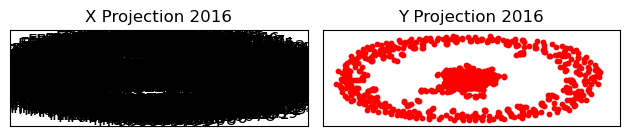

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_excel(r'C:\GSA_Project\S4 Net 16 thru 20.xlsx', sheet_name = 3)

G = nx.Graph()

year = [2016] #similarly calculate for all years from 2016 to 2020
i = 1

for y in year:
    for _, row in df.iterrows():
            if row['Fiscal Year'] == y:
                source = str(row['Unique proposal ID'])
                target = str(row['Unique researcher ID [one unique researcher per row, add addl rows with same proposal ID for all collaborators on proposal]'])
                match = row['Match'] 
                G.add_node(source, bipartite = 0, label = row['Name'])
                G.add_node(target, bipartite = 1, label = row['Name'], match = match)
                G.add_edge(source, target)

    # Save each visualization as an HTML file
    # net.show('graph.html')
    X_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
    Y_nodes = set(G) - X_nodes

    # Create X projection graph
    X_projection = nx.bipartite.projected_graph(G, X_nodes)

    # Create Y projection graph
    Y_projection = nx.bipartite.projected_graph(G, Y_nodes)

    # Plot the X projection
    plt.subplot(4, 2, i)
    pos = nx.spring_layout(X_projection)
    nx.draw_networkx(X_projection, pos, node_color='b', with_labels=True, node_size = 10)
    plt.title('X Projection {0}'.format(y))
    
    i += 1

    # Plot the Y projection
    plt.subplot(4, 2, i)
    pos = nx.spring_layout(Y_projection)
    nx.draw_networkx(Y_projection, pos, node_color='r', with_labels=True, node_size = 10,labels=nx.get_node_attributes(Y_projection, 'Name'))
    plt.title('Y Projection {0}'.format(y))
    
    i += 1

plt.tight_layout()
# plt.savefig('figure.html')
# plt.show()


# Export the graph as a Gephi-compatible file
nx.write_gexf(Y_projection, "matchgraph_2016a.gexf")



In [7]:
# Calculate the degree, betweeness, closeness, eigen vector and ego densities of each target node in the Y_projection graph



degrees = dict(Y_projection.degree())
betweenness = nx.betweenness_centrality(Y_projection)
closeness = nx.closeness_centrality(Y_projection)
eigen = nx.eigenvector_centrality(Y_projection)

# # Define a function to calculate ego density
def calculate_ego_density(graph, node):
    ego_network = nx.ego_graph(graph, node)
    ego_density = nx.density(ego_network)
    return ego_density

# # Calculate ego densities for all nodes in the network
ego_densities = {}
for node in Y_projection.nodes:
    ego_densities[node] = calculate_ego_density(Y_projection, node)

df = pd.DataFrame(degrees, index = [0]).transpose()
df = pd.DataFrame.from_dict([degrees.keys(),degrees.values(),betweenness.values(),closeness.values(),eigen.values(),ego_densities.values()])
df.transpose().to_excel('target2020.xlsx')

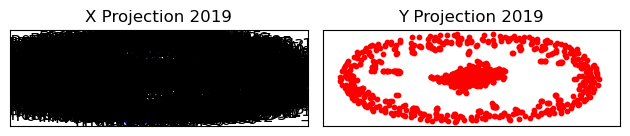

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_excel(r'C:\GSA_Project\S4 Net 16 thru 20.xlsx', sheet_name = 3)

G = nx.Graph()

year = [2019] #similarly calculate ethnicity graphs for all years from 2016 to 2020
i = 1

for y in year:
    for _, row in df.iterrows():
            if row['Fiscal Year'] == y:
                source = str(row['Unique proposal ID'])
                target = str(row['Unique researcher ID [one unique researcher per row, add addl rows with same proposal ID for all collaborators on proposal]'])
                ethnicity = row['Ethnicity'] 
                G.add_node(source, bipartite = 0, label = row['Name'])
                G.add_node(target, bipartite = 1, label = row['Name'], match = ethnicity)
                G.add_edge(source, target)

    # Save each visualization as an HTML file
    # net.show('graph.html')
    X_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
    Y_nodes = set(G) - X_nodes

    # Create X projection graph
    X_projection = nx.bipartite.projected_graph(G, X_nodes)

    # Create Y projection graph
    Y_projection = nx.bipartite.projected_graph(G, Y_nodes)

    # Plot the X projection
    plt.subplot(4, 2, i)
    pos = nx.spring_layout(X_projection)
    nx.draw_networkx(X_projection, pos, node_color='b', with_labels=True, node_size = 10)
    plt.title('X Projection {0}'.format(y))
    
    i += 1

    # Plot the Y projection
    plt.subplot(4, 2, i)
    pos = nx.spring_layout(Y_projection)
    nx.draw_networkx(Y_projection, pos, node_color='r', with_labels=True, node_size = 10,labels=nx.get_node_attributes(Y_projection, 'Name'))
    plt.title('Y Projection {0}'.format(y))
    
    i += 1

plt.tight_layout()
# plt.savefig('figure.html')
# plt.show()


# Export the graph as a Gephi-compatible file
nx.write_gexf(Y_projection, "ethnicitygraph_2019a.gexf")



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_excel(r'C:\GSA_Project\S4 Net 16 thru 20.xlsx', sheet_name = 3)

G = nx.Graph()

year = [2017] #similarly calculate gender graphs for all years from 2016 to 2020
i = 1

for y in year:
    for _, row in df.iterrows():
            if row['Fiscal Year'] == y:
                source = str(row['Unique proposal ID'])
                target = str(row['Unique researcher ID [one unique researcher per row, add addl rows with same proposal ID for all collaborators on proposal]'])
                gender = row['Gender'] 
                G.add_node(source, bipartite = 0, label = row['Name'])
                G.add_node(target, bipartite = 1, label = row['Name'], gender = gender)
                G.add_edge(source, target)

    # Save each visualization as an HTML file
    # net.show('graph.html')
    X_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
    Y_nodes = set(G) - X_nodes

    # Create X projection graph
    X_projection = nx.bipartite.projected_graph(G, X_nodes)

    # Create Y projection graph
    Y_projection = nx.bipartite.projected_graph(G, Y_nodes)

    # Plot the X projection
    plt.subplot(4, 2, i)
    pos = nx.spring_layout(X_projection)
    nx.draw_networkx(X_projection, pos, node_color='b', with_labels=True, node_size = 10)
    plt.title('X Projection {0}'.format(y))
    
    i += 1

    # Plot the Y projection
    plt.subplot(4, 2, i)
    pos = nx.spring_layout(Y_projection)
    nx.draw_networkx(Y_projection, pos, node_color='r', with_labels=True, node_size = 10,labels=nx.get_node_attributes(Y_projection, 'Name'))
    plt.title('Y Projection {0}'.format(y))
    
    i += 1

plt.tight_layout()
# plt.savefig('figure.html')
# plt.show()


# Export the graph as a Gephi-compatible file
nx.write_gexf(Y_projection, "gendergraph_2020a.gexf")

